## Universidad Autonoma de Nuevo León
## Facultad de Ciencias Físico Matemáticas
### Maestría en Ciencia de Datos
### Aprendizaje Automático
#### Eduardo David González Flores
##### 1515489

## Tarea en clase (2 puntos)
Crear repositorio para el curso que contenga 
- un `read.me` con una breve descripción de tu repositorio para este curso (primer *commit*), y
- un archivo Jupyter para la primera tarea con un ejemplo de regresión lineal o correlación hecho en puro Python (segundo *commit*)

In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [33]:
#Lectura de datos
df = pd.read_csv('../data/insurance.csv')
df = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)
df

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,1,0,0
1334,18,31.920,0,2205.98080,0,0,0,0,0
1335,18,36.850,0,1629.83350,0,0,0,1,0
1336,21,25.800,0,2007.94500,0,0,0,0,1


In [41]:
df.columns.tolist()[:-1]

['age',
 'bmi',
 'children',
 'charges',
 'sex_male',
 'smoker_yes',
 'region_northwest',
 'region_southeast']

In [42]:
#X = df[['age', 'bmi', 'children']]
#X = df[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
X = df[['age',
 'bmi',
 'children',
 'sex_male',
 'smoker_yes',
 'region_northwest',
 'region_southeast']]
y = df['charges']


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [44]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [45]:
y_pred = model.predict(X_test)


In [46]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared (R2): {r2}')


Mean Squared Error: 33811888.8191718
R-squared (R2): 0.7822082763944292


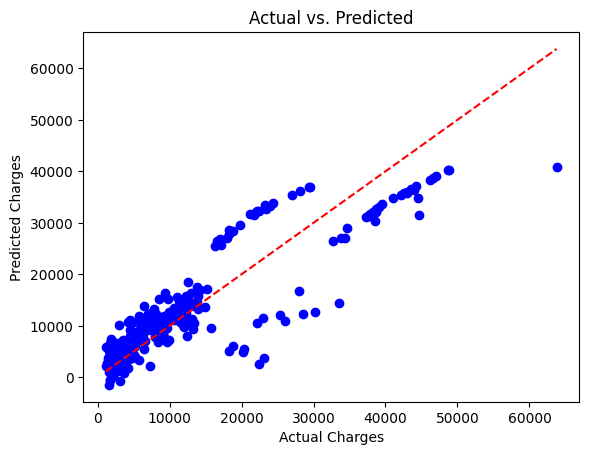

In [47]:
import matplotlib.pyplot as plt

# Assuming you have y_pred and y_test from your linear regression model

# Scatter plot of actual vs. predicted values
plt.scatter(y_test, y_pred, color='blue')
plt.title("Actual vs. Predicted")
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")

# Regression line
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.show()
